In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label','text'])

In [3]:
# Dokumen = series df
# corpus = kumpulan dokumen / semacam df
#TF = Term Frequency
#IDF = Inverse Document Frequency

In [4]:
#semakin banyak kata tersebut muncul di dokumen, semakin penting kata tersebut
#semakin banyak kata tersebut muncul di corpus, semakin tidak penting suatu kata

# Feature Engineering

In [4]:
data['text_length'] = data['text'].apply(lambda x:len(x))

### Clean the sms Text

In [5]:
import re

In [6]:
data.head()

,label,text,text_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [7]:
#re.sub("[^a-zA-Z]", " ", data['text'])

In [7]:
def clean_text(x):
    letter_only=re.sub("[^a-zA-Z]", " ", x)
    return ' '.join(letter_only.split()).lower()

In [8]:
data['clean_text']=data['text'].apply(clean_text)

In [9]:
data.head()

,label,text,text_length,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives arou...


In [10]:
data['clean_text_length']=data['clean_text'].apply(lambda x : len(x))

In [11]:
data.head()

,label,text,text_length,clean_text,clean_text_length
0,ham,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...,102
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni,23
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...,126
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say,43
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives arou...,60


### Find Meaningfull word on every document

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [13]:
count_vectorizer_transformer=CountVectorizer().fit(data['clean_text'])
count_vectorizer_res=count_vectorizer_transformer.transform(data['clean_text'])
tf_idf_transformer=TfidfTransformer().fit(count_vectorizer_res)
tf_idf_res=tf_idf_transformer.transform(count_vectorizer_res)
df_tf_idf = pd.DataFrame(tf_idf_res.todense(),columns=count_vectorizer_transformer.get_feature_names())

In [30]:
df_tf_idf

,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zeros,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df_tf_idf.iloc[0].sort_values(ascending=False).head(3)

jurong    0.327564
amore     0.327564
buffet    0.312695
Name: 0, dtype: float64

In [15]:
meaningfull_words = []
for item in range(len(data)):
    words = list(df_tf_idf.iloc[item].sort_values(ascending=False).head(3).index)
    meaningfull_words.append(words)

In [16]:
data['meaningfull words']=meaningfull_words

In [17]:
data.head()

,label,text,text_length,clean_text,clean_text_length,meaningfull words
0,ham,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...,102,"[jurong, amore, buffet]"
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni,23,"[oni, joking, wif]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...,126,"[fa, entry, tkts]"
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say,43,"[say, hor, early]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives arou...,60,"[he, lives, nah]"


# EDA

In [18]:
from nltk.corpus import stopwords

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from collections import Counter

In [21]:
def show_most_words_appear(data):
    all_words=' '.join(list(data))
    list_all_words = all_words.split()
    word_count = Counter(list_all_words)
    word_count_series=pd.Series(word_count)
    word_wo_stopwords = []
    for item in word_count_series.index:
        if(item not in stopwords.words('english')):
            word_wo_stopwords.append(item)
    word_count_series=word_count_series.loc[word_wo_stopwords]
    most_words_appear =word_count_series.sort_values(ascending=False).head(20)
    plt.figure(figsize=(15,5))
    sns.barplot(most_words_appear.index, most_words_appear.values)

In [22]:
data.head()

,label,text,text_length,clean_text,clean_text_length,meaningfull words
0,ham,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...,102,"[jurong, amore, buffet]"
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni,23,"[oni, joking, wif]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...,126,"[fa, entry, tkts]"
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say,43,"[say, hor, early]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives arou...,60,"[he, lives, nah]"


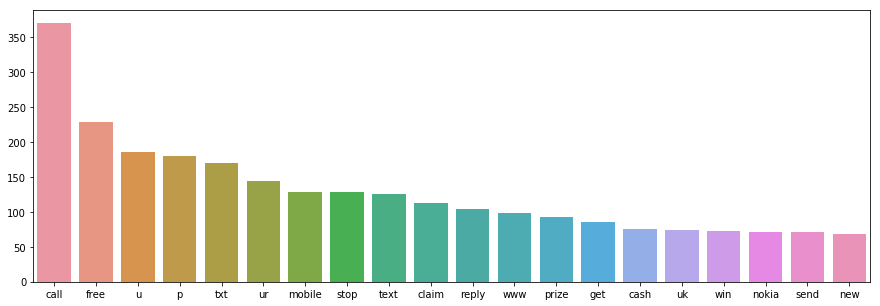

In [23]:
show_most_words_appear(data[data['label']=='spam']['clean_text'])

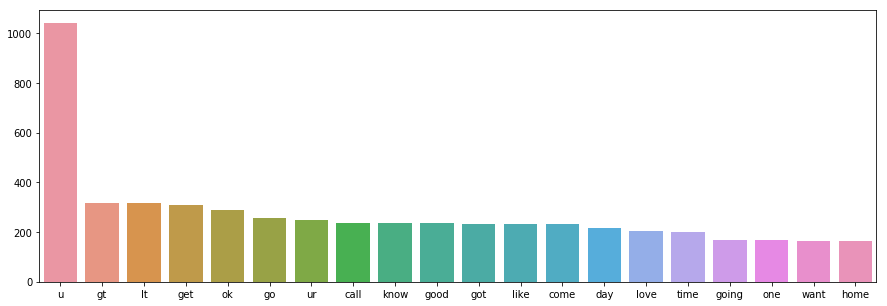

In [22]:
show_most_words_appear(data[data['label']=='ham']['clean_text'])

In [20]:
new_meaningfull = [' '.join(item) for item in data['meaningfull words']]

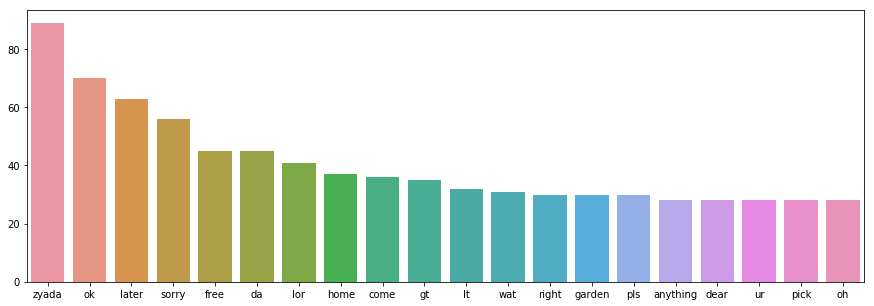

In [21]:
show_most_words_appear(pd.Series(new_meaningfull))

In [23]:
#Wordcloud
from wordcloud import WordCloud

In [24]:
wc = WordCloud(background_color='wjite', max_font_size=40, max_words=200)

In [32]:
def show_wordcloud(text):
    wc = WordCloud(background_color='black', max_font_size=40, max_words=200)
    my_wc = wc.generate(text)
    plt.figure(figsize=(20,5))
    plt.imshow(my_wc, interpolation='bilinear')
    plt.axis('off')
    plt.show

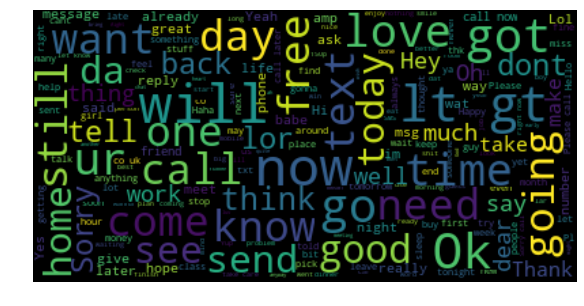

In [33]:
show_wordcloud(' '.join(list(data['text'])))

In [31]:
string_ham = ' '.join(list(data[data['label']=='ham']['clean_text']))

In [ ]:
show_wordcloud(string_spam)

In [ ]:
string_spam = ' '.join(list(data[data['label']=='spam']['clean_text']))

In [ ]:
show_wordcloud(string_spam)

# Modelling

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test = tts(tf_idf_res, data['label'], random_state=101)

In [ ]:
model_1 = MultinomialNB().fit(X_train, y_train)
prediction =model_1.predict(X_test)
print(classification_report(y_test,prediction))

In [ ]:
mes = ' you win our monthly reward, please reply to this number to claim the reward'
cv = count_vectorizer_transformer.transform([mes])
tf = tf_idf_transformer.transform(cv)
model_1.predict(tf)

### Contoh 2 

In [ ]:
count_vectorizer_transformer=CountVectorizer().fit(data['clean_text'])
count_vectorizer_res=count_vectorizer_transformer.transform(data['clean_text'])
tf_idf_transformer=TfidfTransformer().fit(count_vectorizer_res)
tf_idf_res=tf_idf_transformer.transform(count_vectorizer_res)
df_tf_idf = pd.DataFrame(tf_idf_res.todense(),columns=count_vectorizer_transformer.get_feature_names())